In this notebook we try to inversigate which variables can be important when dependent feature is not panelpat (attrition), but other, related to quality of responses (particularly straighlining or number of "don't know" marks chosen)

In [1]:
import pandas as pd
import numpy as np
import csv
from sklearn import tree
from collections import Counter
import sklearn.model_selection
import matplotlib.pyplot  as plt
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import cross_val_predict, train_test_split, cross_val_score, KFold, cross_validate, GridSearchCV
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from numpy import mean, std
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import seaborn as sns
import warnings
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
import xgboost 
from sklearn.utils import resample
from Analysis_functions import *
pd.set_option('display.max_colwidth', None)
from itertools import repeat
warnings.filterwarnings('ignore')

[NbConvertApp] Converting notebook Analysis_functions.ipynb to script
[NbConvertApp] Writing 15076 bytes to Analysis_functions.py


In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

### Straightlining
if person chooses the same option in agreement questions more than 60%, then y=1, otherwise y=0

 
WAVE:  1
Counter({0: 3521, 1: 95})
DecisionTreeClassifier(class_weight='balanced', max_depth=4,
                       min_samples_leaf=20)
 


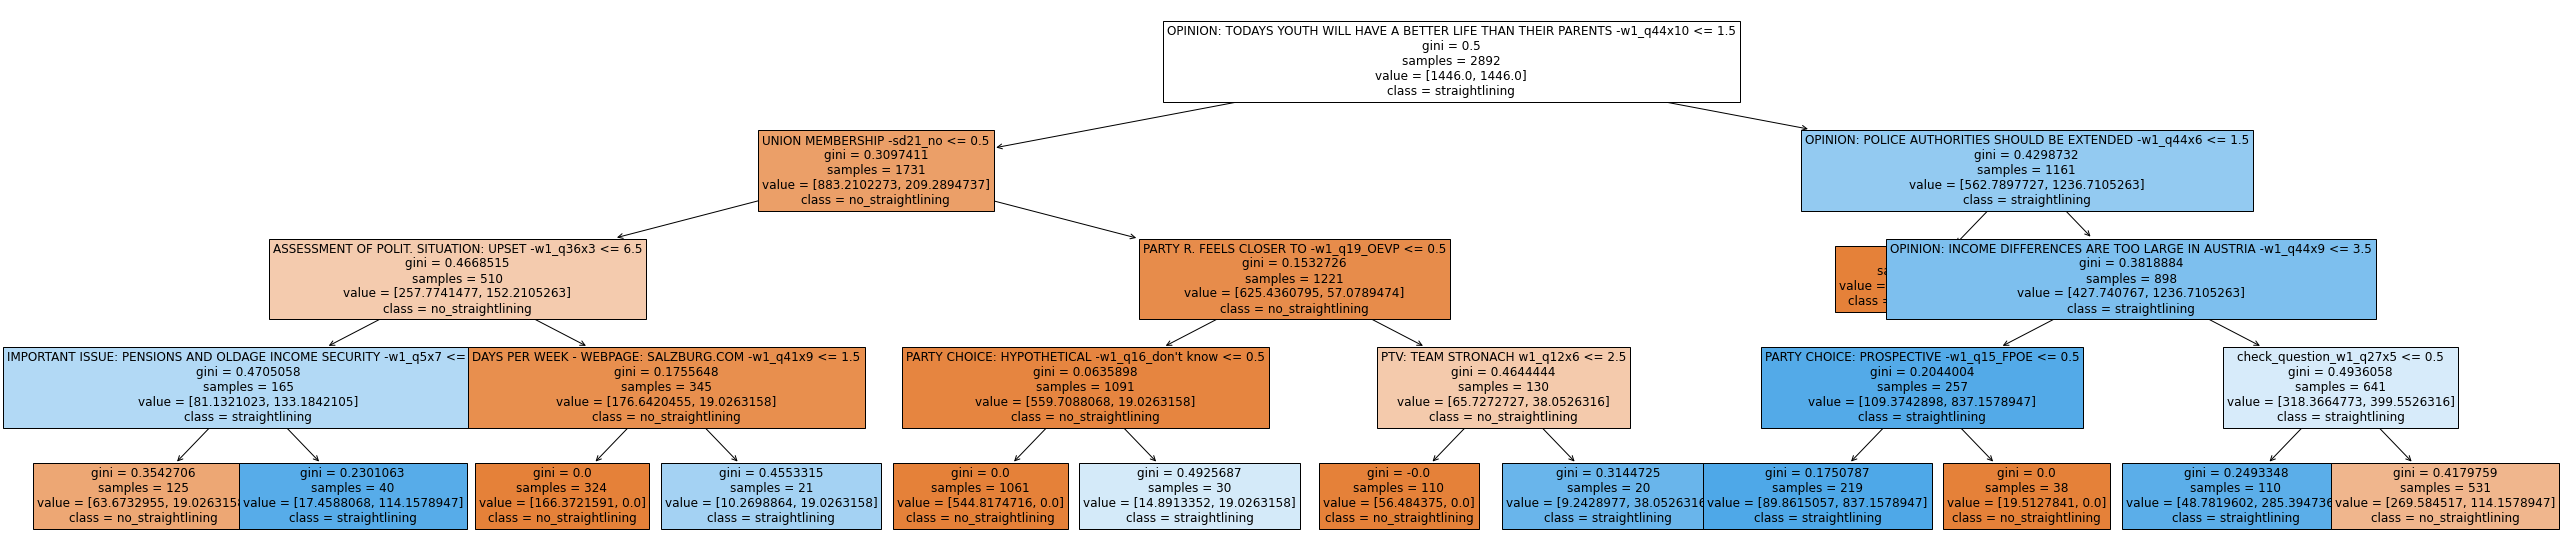

The most important features and its coefficients obtained by logistic regression:
OPINION: TODAYS YOUTH WILL HAVE A BETTER LIFE THAN THEIR PARENTS -w1_q44x10 :  16.024
RELIGIOUS AFFILIATION -sd8_other :  -11.932
OPINION: PROTECT ENVIRONMENT, EVEN IF LIFE BECOMES MORE EXPENSIVE -w1_q44x8 :  -11.614
Country of birth, father -sd20_Poland, Slovenia, Czech Republic, Hungary :  11.336
SAME ACCESS TO SOCIAL BENEFITS: NON-AUSTRIANS -w1_q37x1 :  11.145
TURNOUT: NATIONAL ELECTION 2013 -w1_q23_usually vote, not this time :  -10.682
OPINION: HAVE A STRONG LEADER IN GOVERNMENT WHO DECIDES ALONE -w1_q27x6 :  10.524
PARTY R. FEELS CLOSER TO -w1_q19_SPOE :  -10.209
MEMBERS OF HOUSEHOLD YOUNGER THAN 18 YEARS -sd6 :  10.017
PTV: TEAM STRONACH w1_q12x6 :  9.928
KNOWLEDGE: HANS-PETER DOSKOZIL -w1_q33x1_FPOE :  9.761
VOTE CHOICE: NATIONAL ELECTION 2013 -w1_q24_voted invalid :  -9.689
OPINION: MOST POLITICIANS ARE TRUSTWORTHY -w1_q27x3 :  9.546
VOTE CHOICE: NATIONAL ELECTION 2013 -w1_q24_don't know :  -9.40

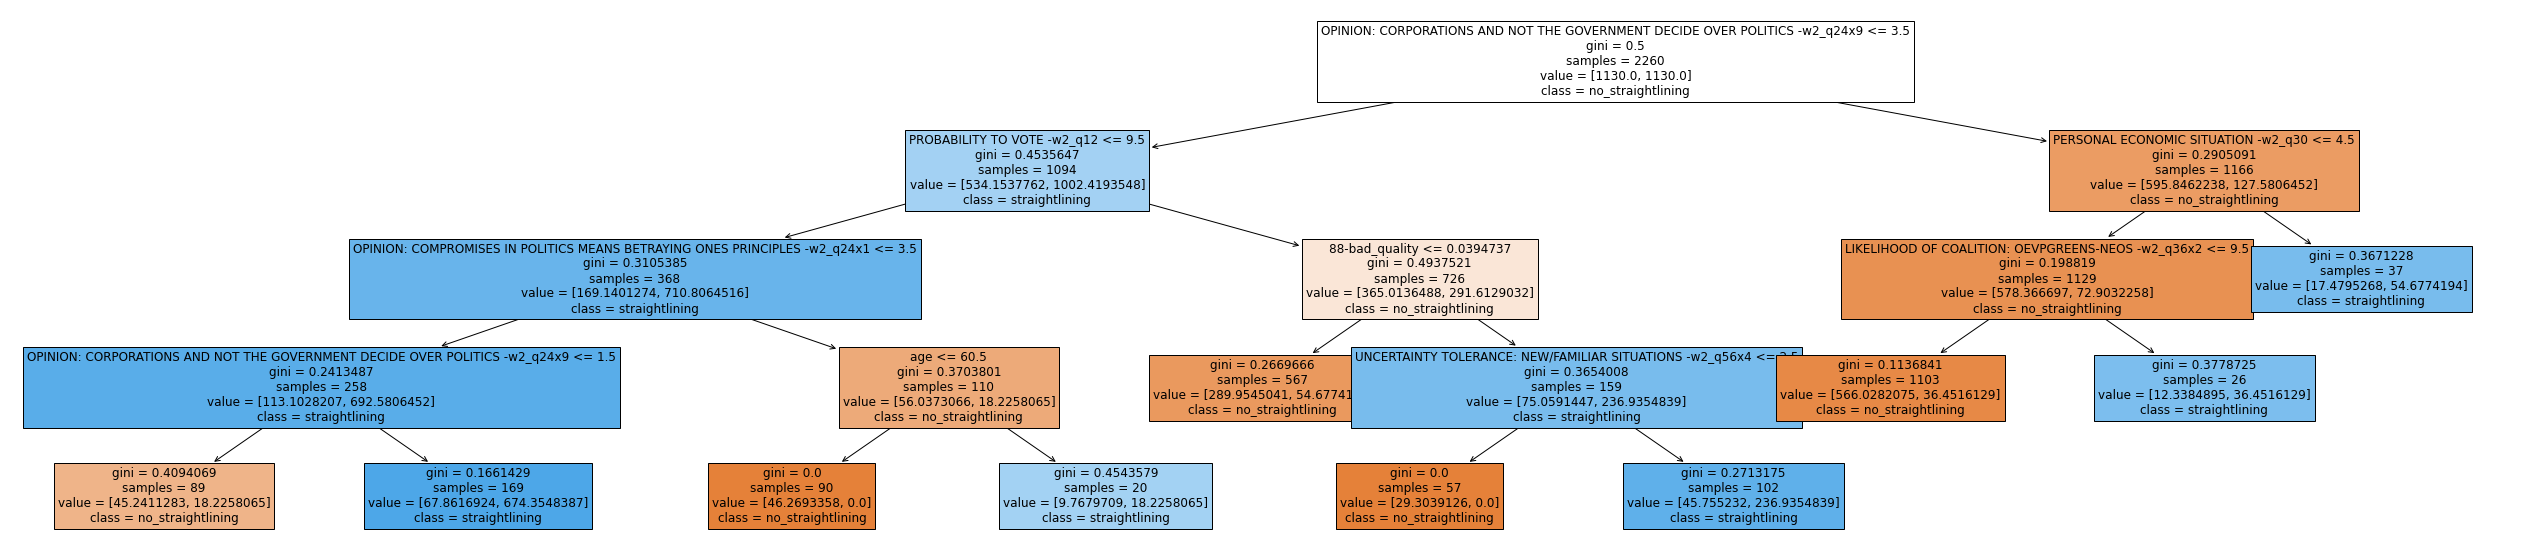

The most important features and its coefficients obtained by logistic regression:
OPINION: MOST POLITICIANS ARE TRUSTWORTHY -w2_q24x3 :  21.141
don't know-bad_quality :  15.828
EXPERIMENT: FAMILY ALLOWANCES - IMMIGRATION PRIME -w2_q19_higher earners should receive more family allowance :  15.277
TYPE OF OCCUPATION -sd14_self-employed without employees :  -14.0
PTV: LIST SEBASTIAN KURZ - THE NEW PEOPLES PARTY -w2_q5x2 :  11.794
PARTY CHOICE: HYPOTHETICAL -w2_q14_don't know :  11.724
MOST COMPETENT PARTY: ENVIRONMENTAL PROTECTION -w2_q26x5_OEVP :  -10.884
OTHER OCCUPATION -sd12_none of the above :  -10.859
check_question_w2_q24x5 :  -10.622
POLITICAL DISCUSSION - PARTY PREFERENCE: 2. PERSON -w2_q53_The Greens :  10.557
PARTY ASSOCIATED WITH: ECONOMIC POLICY -w2_q25x4_FPOE :  -10.511
FEDERAL STATE -sd4_Carinthia :  -10.255
timeOfResponding_nighttime :  -9.965
PARTY ASSOCIATED WITH: ENVIRONMENTAL PROTECTION -w2_q25x5_SPOE :  -9.858
CURRENT PERSONAL SITUATION -sd10_a student at school :  9.

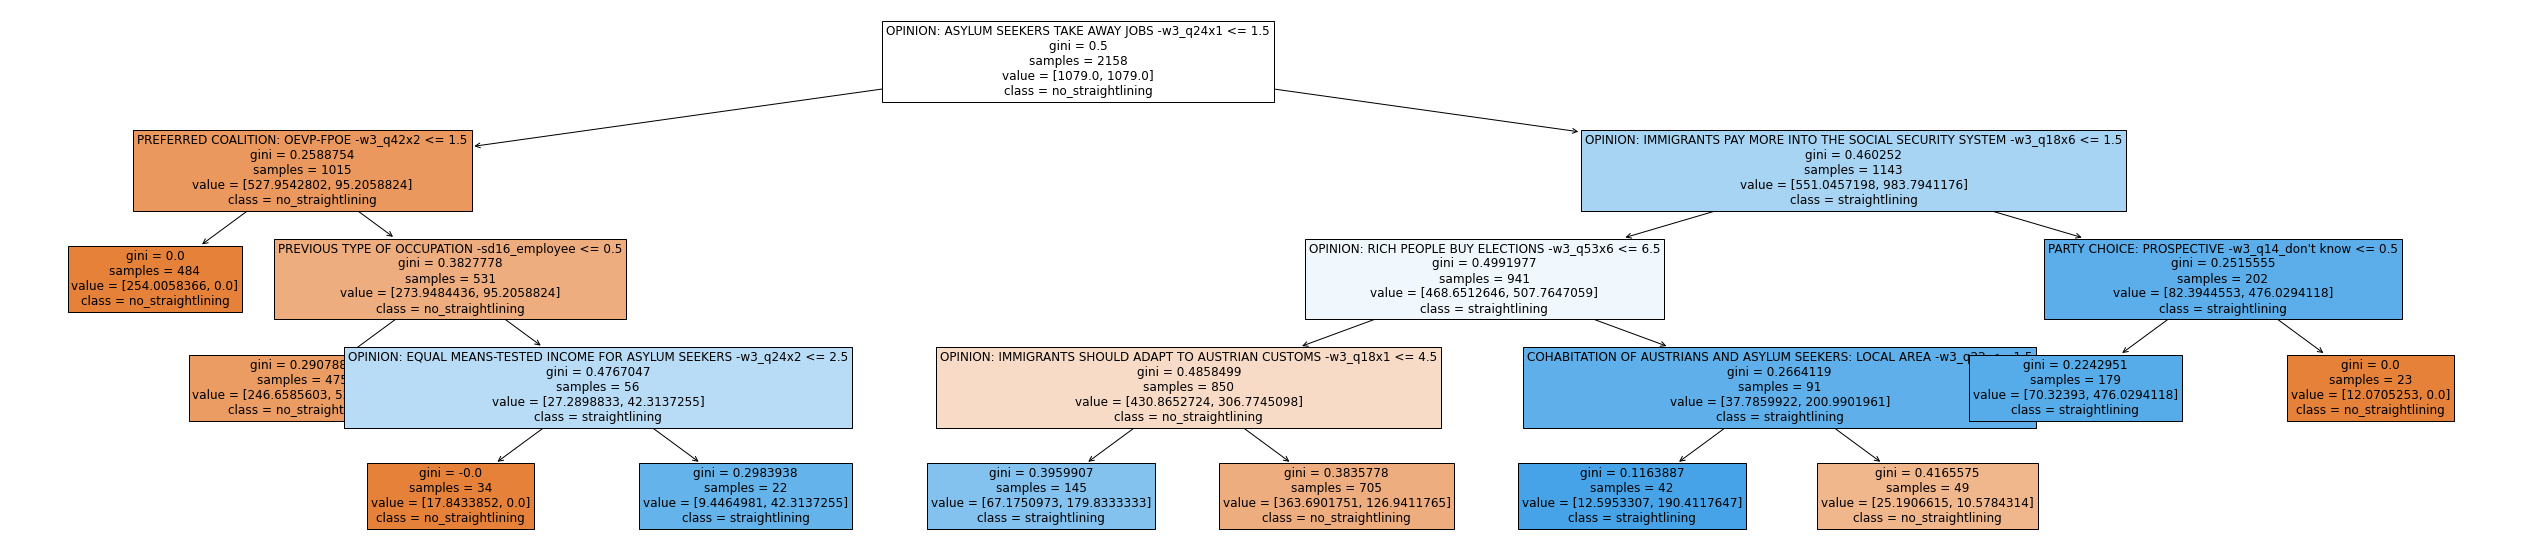

The most important features and its coefficients obtained by logistic regression:
OPINION: ELECTION ADMINISTRATION BEHAVES CORRECTLY -w3_q53x5 :  -24.062
don't know-bad_quality :  21.158
OPINION: ASYLUM SEEKERS TAKE AWAY JOBS -w3_q24x1 :  19.461
OPINION: IMMIGRANTS SHOULD ADAPT TO AUSTRIAN CUSTOMS -w3_q18x1 :  -16.904
DIRECT ELECTION OF CHANCELLOR -w3_q46_none of the above :  -15.783
OPINION: TV FAVORS GOVERNING PARTIES -w3_q53x2 :  -15.211
ASSESSMENT - CHARISMA: CHRISTIAN KERN -w3_q11x1 :  -14.247
OPINION: THANKFUL FOR LEADING FIGURES -w3_q45x1 :  13.69
MOST COMPETENT PARTY: IMMIGRATION -w3_q29x2_NEOS :  12.723
INTEREST IN NEWS: AUSTRIAS ECONOMIC GROWTH DECREASES -w3_q5x4 :  -12.313
POLITICIAN VISITED R. AT HOME/WORK DURING CAMPAIGN: DONT KNOW -w3_q49x5_8 :  -12.275
OPINION: IMMIGRANTS PAY MORE INTO THE SOCIAL SECURITY SYSTEM -w3_q18x6 :  12.036
PARTY CHOICE: PROSPECTIVE -w3_q14_NEOS :  -11.593
OPINION: POLITICIANS DO NOT CARE ABOUT WHAT PEOPLE LIKE ME THINK -w3_q2x2 :  -11.4
R. TALKE

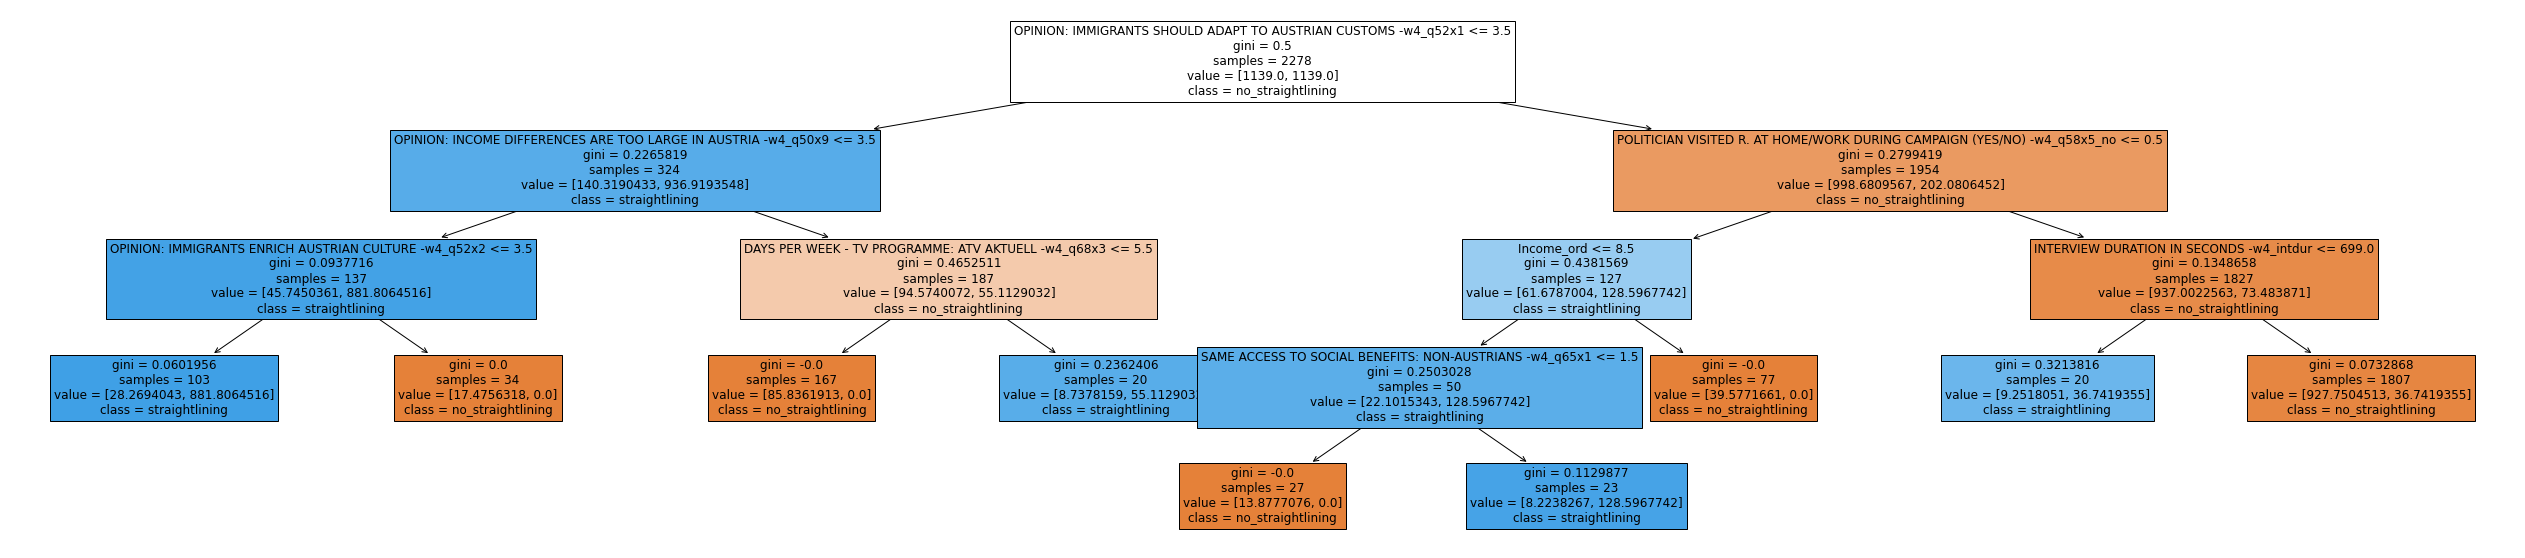

The most important features and its coefficients obtained by logistic regression:
OPINION: IMMIGRANTS SHOULD ADAPT TO AUSTRIAN CUSTOMS -w4_q52x1 :  -8.291
OPINION: IMMIGRANTS PAY MORE INTO THE SOCIAL SECURITY SYSTEM -w4_q52x6 :  6.057
don't know-bad_quality :  5.698
INFORMATION ON POLITICAL EVENTS: THROUGH THE RADIO -w4_q66x3 :  4.695
OPINION: INCOME DIFFERENCES ARE TOO LARGE IN AUSTRIA -w4_q50x9 :  -4.534
MEMBERS OF HOUSEHOLD YOUNGER THAN 18 YEARS -sd6 :  -4.126
OPINION: IN GENERAL I KNOW QUITE A LOT ABOUT POLITICS -w4_q3x1 :  -4.087
OPINION: POLITICS MUST FIGHT SOCIAL INEQUALITY -w4_q50x1 :  -4.085
SAME ACCESS TO SOCIAL BENEFITS: NON-AUSTRIANS -w4_q65x1 :  4.061
SAME ACCESS TO SOCIAL BENEFITS: ASYLUM SEEKERS -w4_q65x2 :  3.984
OPINION: VOTING IS A DUTY OF EVERY CITIZEN -w4_q39x1 :  -3.904
PARTY ASSOCIATED WITH: ENVIRONMENTAL PROTECTION -w4_q32x5_The Greens :  -3.712
IMPORTANT ISSUE: NONE OF THE ABOVE -w4_q9x16 :  3.673
TOPIC POLIT. DISCUSSION - REFUSED : 1. PERSON -w4_q80x6 :  3.633


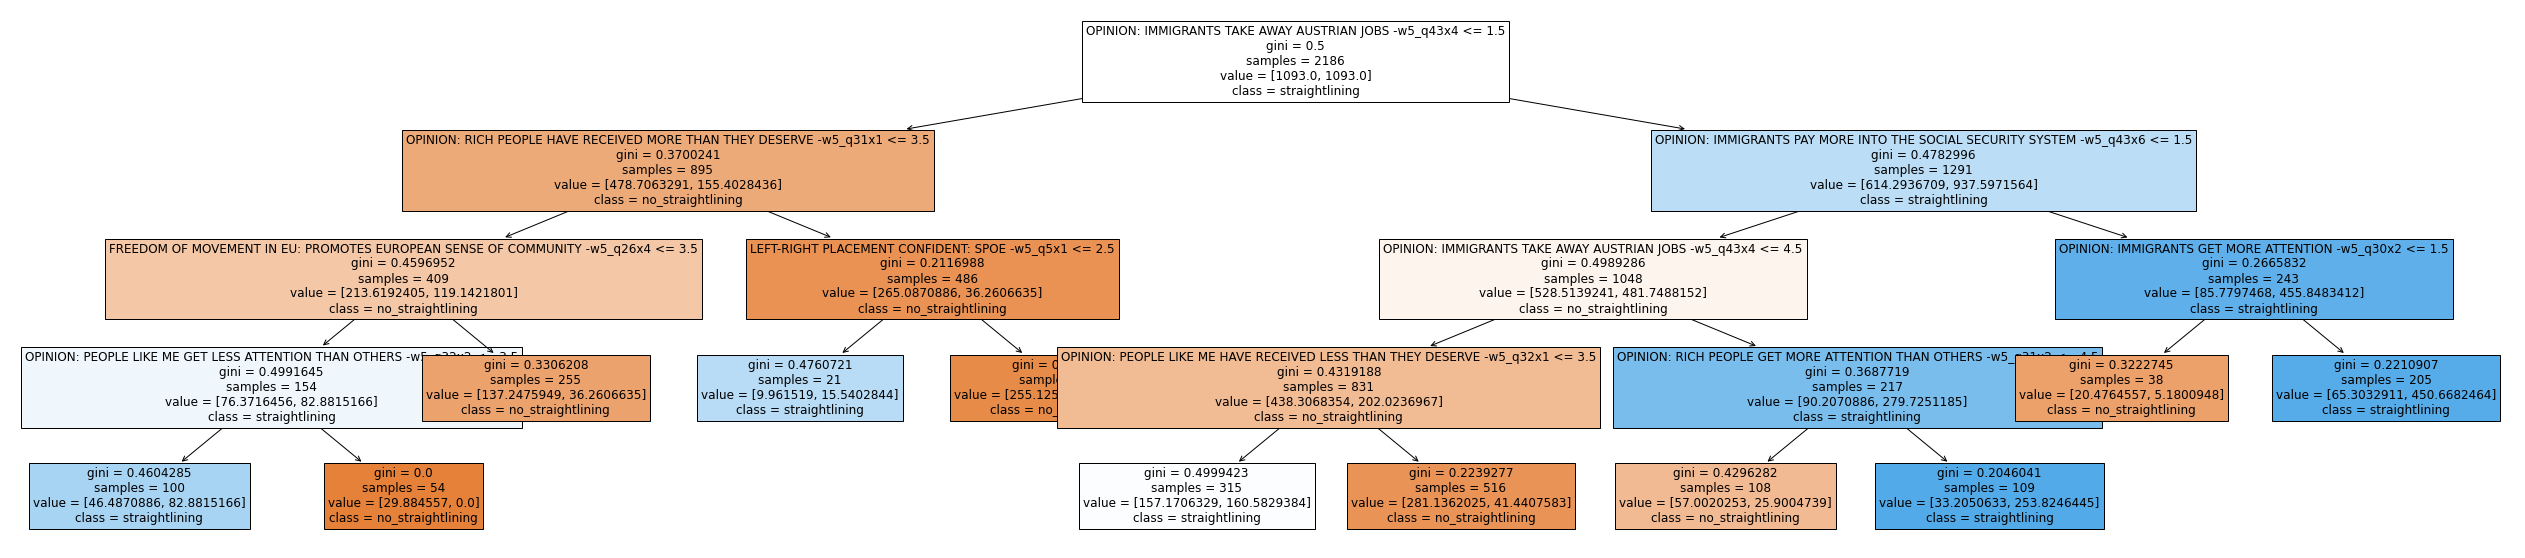

The most important features and its coefficients obtained by logistic regression:
R. RECEIVED A CALL OR A TEXT MESSAGE DURING CAMPAIGN: LIST PETER PILZ -w5_q45x2_6 :  -30.969
INTERVIEWDATUM (DAYS TO ELECTION DAY) -w5_dte :  -18.355
other-bad_quality :  17.885
R. USED TWITTER FOR INFORMATION DURING CAMPAIGN: DONT KNOW -w5_q47x3_8 :  17.703
RELIGIOUS AFFILIATION -sd8_other :  -17.181
OTHER OCCUPATION -sd12_a student at school :  -16.846
R. VISITED FACEBOOK PAGE DURING CAMPAIGN: DONT KNOW -w5_q47x2_8 :  -15.594
CURRENT PERSONAL SITUATION -sd10_employed :  14.904
INITIAL VOTE CHOICE: SILBERSTEIN SCANDAL -w5_q20_NEOS :  -14.874
R. TALKED TO A PARTY WORKER DURING CAMPAIGN: OTHER PARTY -w5_q45x4_7 :  14.851
GOVERNMENT FORMATION: PREFERRED PARTY -w5_q37_other party :  -14.721
GOVERNMENT FORMATION: PREFERRED PARTY -w5_q37_List Peter Pilz :  -14.657
days_to_respond :  -14.573
CURRENT PERSONAL SITUATION -sd10_military/civilian service, voluntary social year :  14.545
INITIAL VOTE CHOICE: SILBERST

In [2]:
waves = ['1', '2', '3', '4', '5'] 

names = ['no_straightlining', 'straightlining']
for wave in waves:
   
    df = pd.read_csv('../../data/data_online_personal_w' + wave + '.csv')
    political_data = pd.read_csv('../../data/data_online_political_w' + wave + '.csv')
    df = concat_df(df, political_data)
    y = df['same_agree_resp']
    X = df.drop(['panelpat', 'same_agree_resp'], axis=1)
    cols = X.columns
    print(' ')
    print('WAVE: ', wave)
    print(Counter(y))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    #undersample = RandomUnderSampler(sampling_strategy='majority')
    #X_train, y_train = undersample.fit_resample(X_train, y_train)
    analysis_all_models(X_train, y_train, X_test, y_test, names)
    
#which_y = ['which_y'] * 6
#wave = waves * 6
    

### How often they one would choose "don't know"?
dont_know_percentage_binary feature: top 25% (in terms of sum of "don't know") are y=1, else 0

 
WAVE:  1
Counter({0.0: 2699, 1.0: 917})
DecisionTreeClassifier(class_weight='balanced', max_depth=4,
                       min_samples_leaf=250)
 


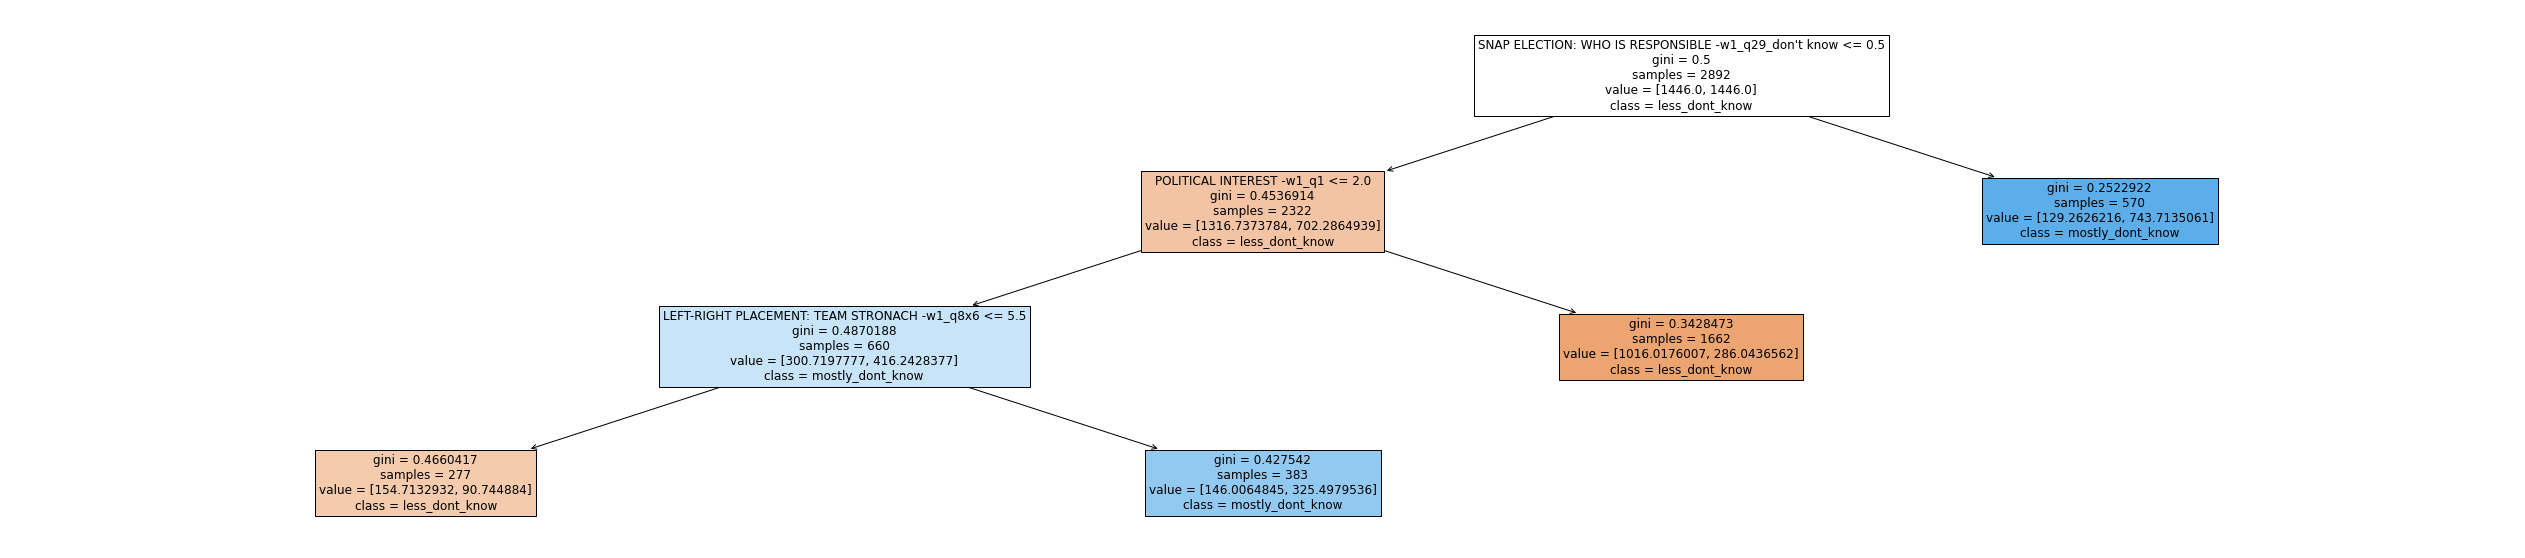

The most important features and its coefficients obtained by logistic regression:
SNAP ELECTION: WHO IS RESPONSIBLE -w1_q29_don't know :  0.684
lr_placement_correct :  0.65
ECON. SITUATION AUSTRIA: PROSPECTIVE (NEXT 12 MONTHS) -w1_q49 :  -0.61
OPINION: IN GENERAL I KNOW QUITE A LOT ABOUT POLITICS -w1_q2x1 :  -0.584
POLITICAL INTEREST -w1_q1 :  -0.574
MOST COMPETENT PARTY: IMMIGRATION -w1_q46x2_FPOE :  -0.489
PTV: TEAM STRONACH w1_q12x6 :  -0.487
TURNOUT: NATIONAL ELECTION 2013 -w1_q23_don't know :  0.438
VOTE: PRESIDENTIAL ELECTION 1.ROUND -w1_q25_Irmgard Griss :  -0.412
IMPORTANCE OF BEING CLOSE TO PARTY -w1_q22 :  -0.381
FEDERAL STATE -sd4_Vorarlberg :  -0.35
VOTE: PRESIDENTIAL ELECTION 2.ROUND -w1_q26_Norbert Hofer :  -0.349
LEFT-RIGHT PLACEMENT: TEAM STRONACH -w1_q8x6 :  0.348
UNION MEMBERSHIP -sd21_don't know :  0.347
MOST COMPETENT PARTY: IMMIGRATION -w1_q46x2_OEVP :  -0.343
PARTY CHOICE: PROSPECTIVE -w1_q15_don't know :  0.34
PTV: NEOS -w1_q12x5 :  -0.33
LIKE-DISLIKE: SEBASTIAN 

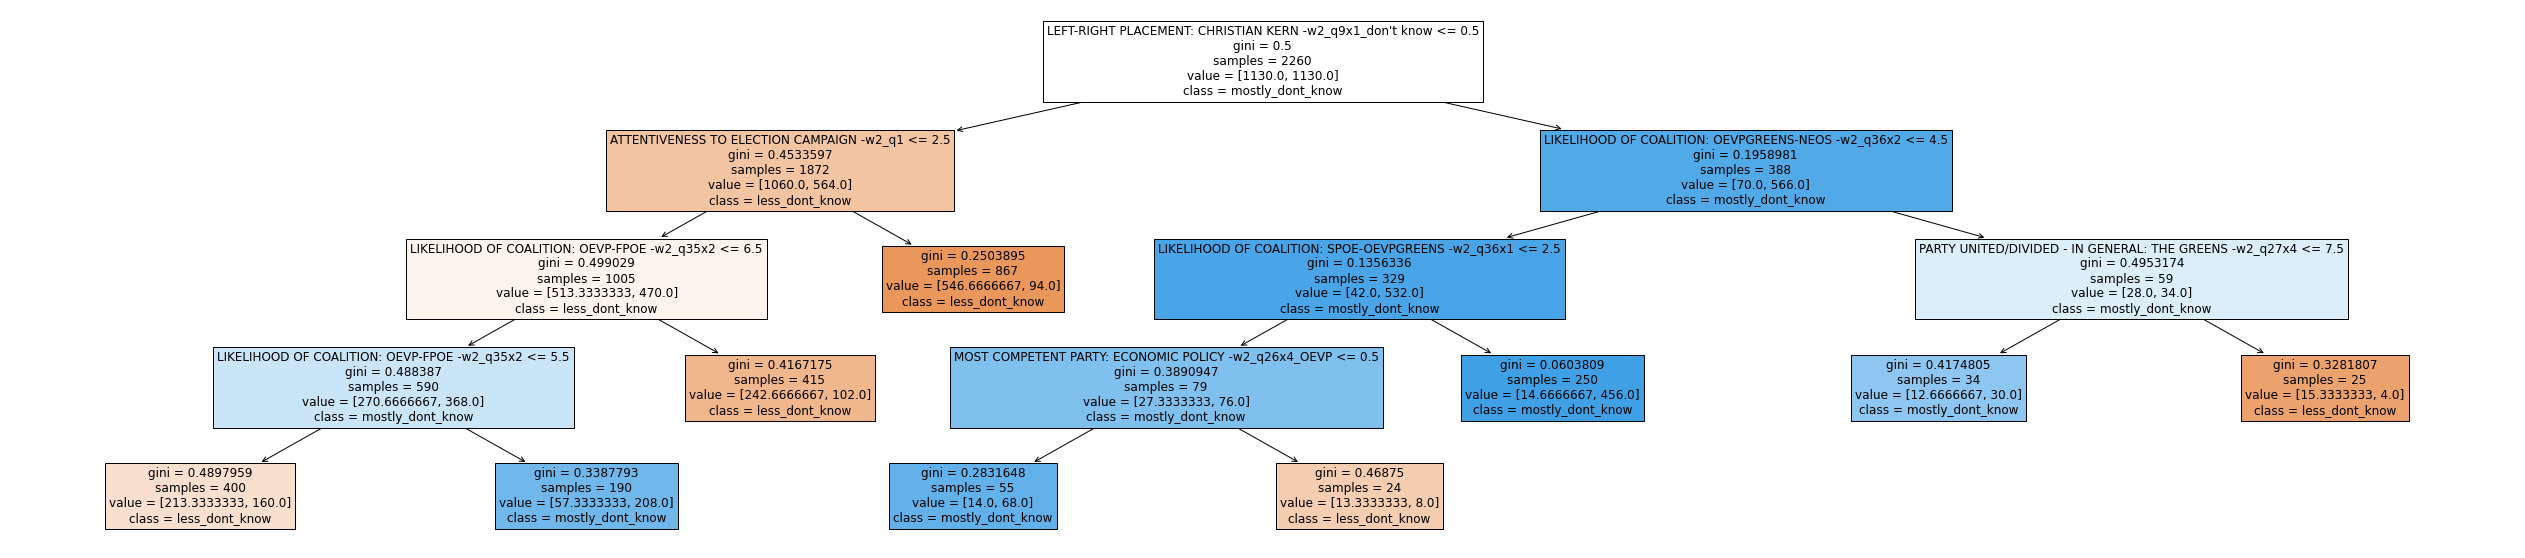

The most important features and its coefficients obtained by logistic regression:
LEFT-RIGHT PLACEMENT: CHRISTIAN KERN -w2_q9x1_don't know :  0.612
ECON. SITUATION AUSTRIA: PROSPECTIVE (NEXT 12 MONTHS) -w2_q32 :  -0.605
ATTENTIVENESS TO ELECTION CAMPAIGN -w2_q1 :  -0.583
OPINION: IN GENERAL I KNOW QUITE A LOT ABOUT POLITICS -w2_q2x1 :  -0.557
Income_ord :  -0.54
LEFT-RIGHT PLACEMENT: SEBASTIAN KURZ -w2_q9x2_don't know :  0.516
MOST COMPETENT PARTY: JOB MARKET AND EMPLOYMENT -w2_q26x1_OEVP :  -0.433
CERTAINTY OF VOTE DECISION -w2_q15_could still change :  -0.391
LEFT-RIGHT PLACEMENT: CHRISTIAN KERN -w2_q9x1_on the left wing of his party :  -0.373
LEFT-RIGHT PLACEMENT: SEBASTIAN KURZ -w2_q9x2_on the right wing of his party :  -0.357
LIKELIHOOD OF ENTERING PARLIAMENT: NEOS -w2_q39x2 :  -0.349
POLITICAL DISCUSSION - PARTY PREFERENCE: 1. PERSON -w2_q49_The Greens :  -0.347
EXPERIMENT: UNEMPLOYMENT BENEFITS - NEUTRAL -w2_q16_higher earners should receive more unemployment pay :  -0.34
POLITI

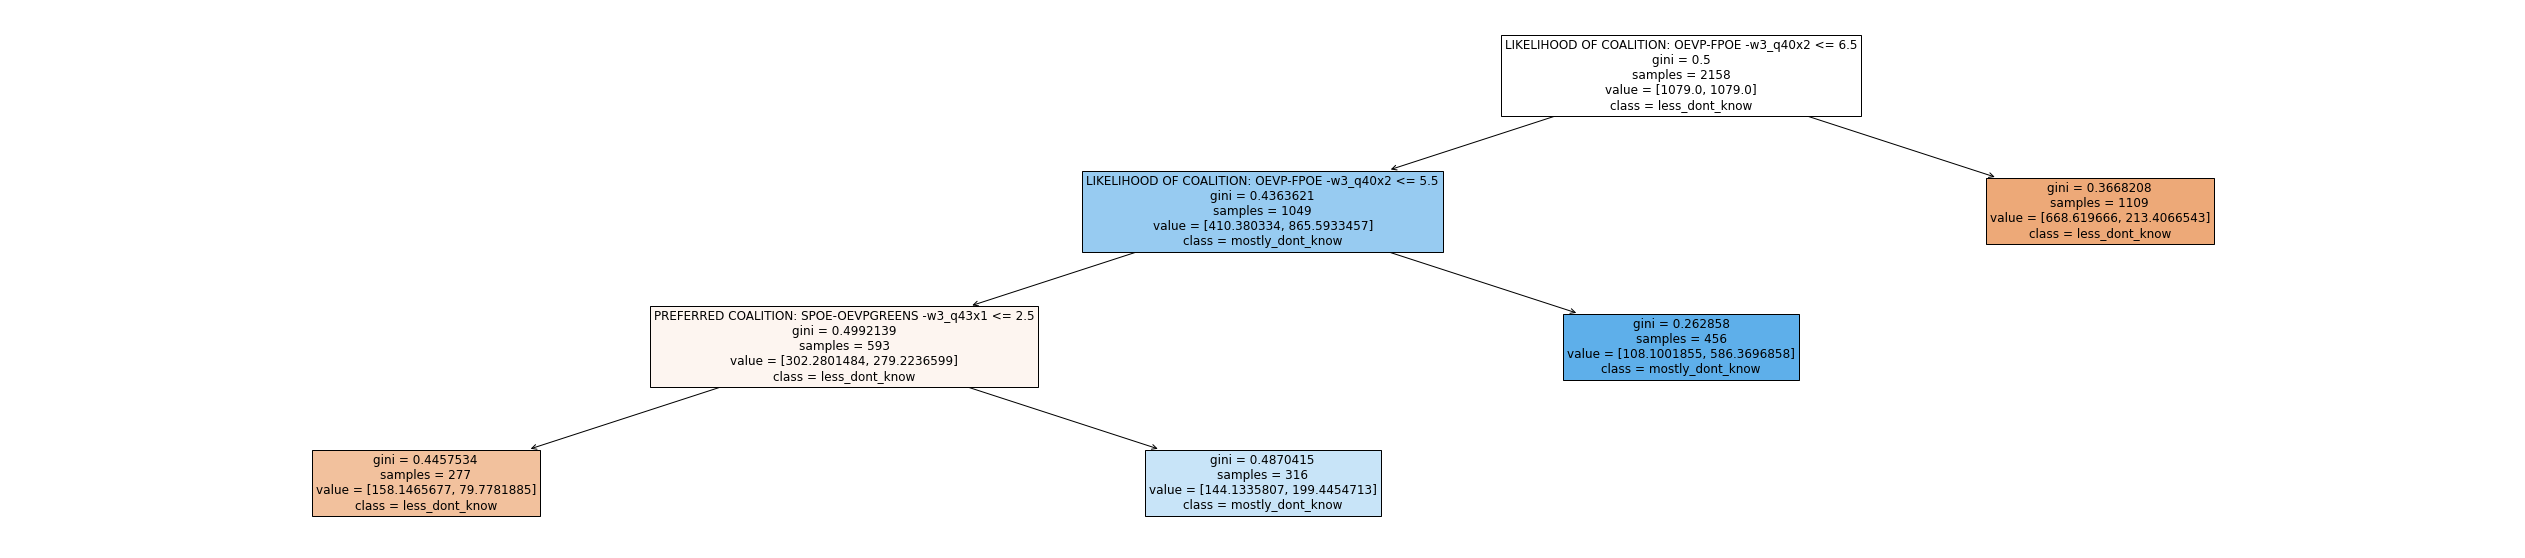

The most important features and its coefficients obtained by logistic regression:
ATTENTIVENESS TO ELECTION CAMPAIGN -w3_q1 :  -0.252
OPINION: IN GENERAL I KNOW QUITE A LOT ABOUT POLITICS -w3_q2x1 :  -0.247
PARTY CHOICE: HYPOTHETICAL -w3_q15_could still change :  -0.202
ECON. SITUATION AUSTRIA: PROSPECTIVE (NEXT 12 MONTHS) -w3_q32 :  -0.189
PARTY ASSOCIATED WITH: FIGHTING CORRUPTION -w3_q28x6_List Peter Pilz :  -0.178
PARTY ASSOCIATED WITH: ECONOMIC POLICY -w3_q28x4_OEVP :  -0.168
MOST COMPETENT PARTY: ENVIRONMENTAL PROTECTION -w3_q29x5_The Greens :  -0.166
MOST COMPETENT PARTY: PENSIONS -w3_q29x7_SPOE :  -0.166
MOST COMPETENT PARTY: FIGHTING CORRUPTION -w3_q29x6_List Peter Pilz :  -0.163
GENDER -sd3_Male :  -0.161
MOST COMPETENT PARTY: JOB MARKET AND EMPLOYMENT -w3_q29x1_OEVP :  -0.156
PARTY CHOICE: HYPOTHETICAL -w3_q15_fixed :  -0.152
OPINION: TV FAVORS GOVERNING PARTIES -w3_q53x2 :  -0.151
OPINION: ELECTION ADMINISTRATION BEHAVES CORRECTLY -w3_q53x5 :  -0.15
GENDER -sd3_Female :  0.

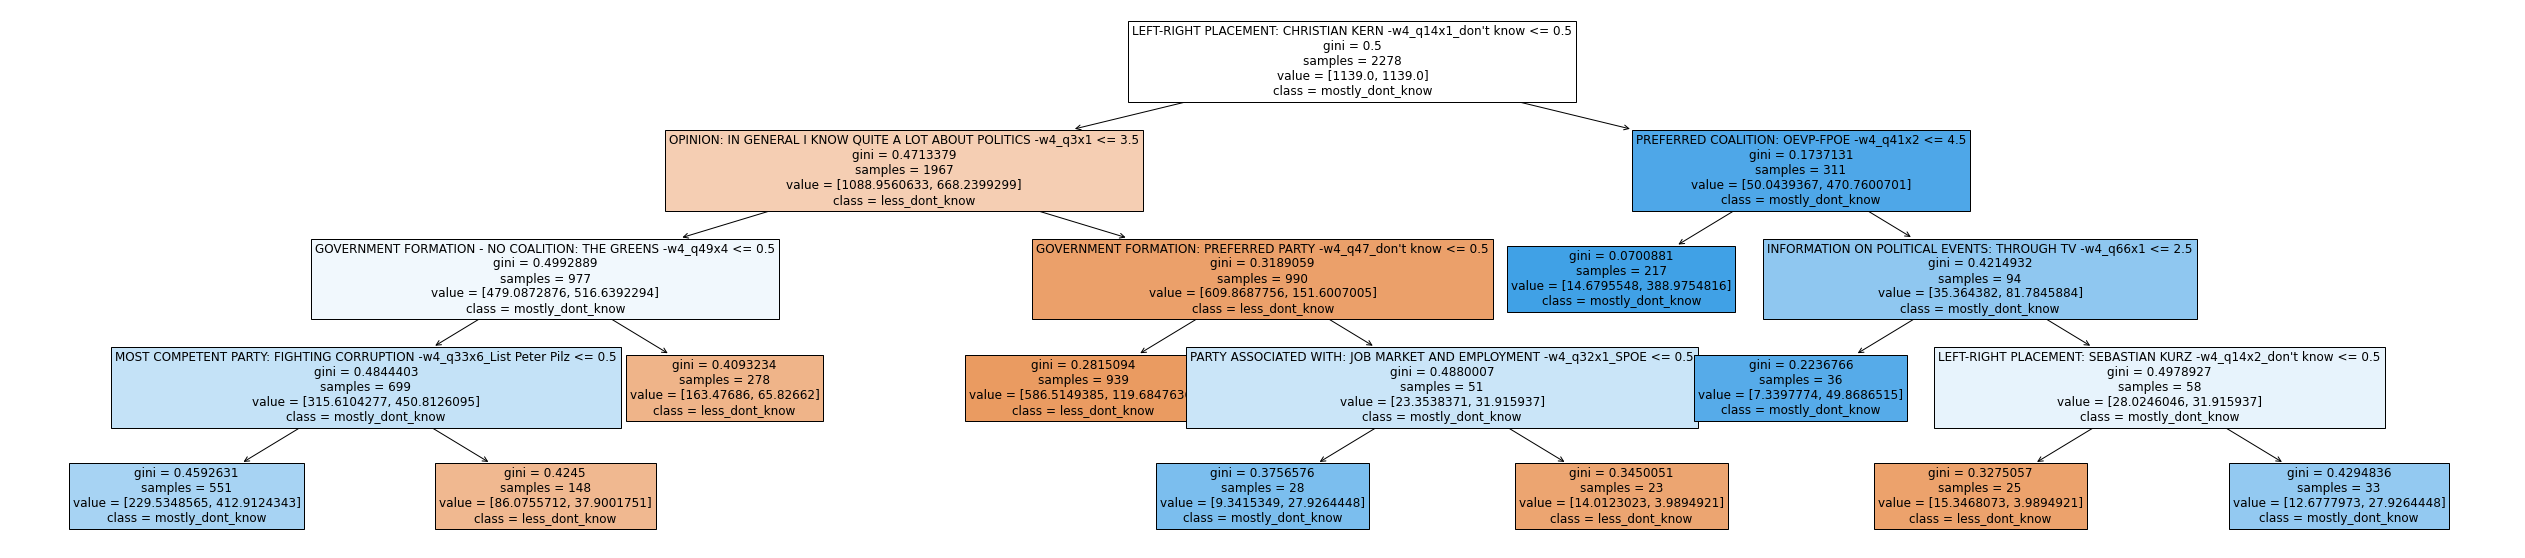

The most important features and its coefficients obtained by logistic regression:
LEFT-RIGHT PLACEMENT: SEBASTIAN KURZ -w4_q14x2_don't know :  0.559
LEFT-RIGHT PLACEMENT: CHRISTIAN KERN -w4_q14x1_don't know :  0.503
OPINION: IN GENERAL I KNOW QUITE A LOT ABOUT POLITICS -w4_q3x1 :  -0.479
MOST COMPETENT PARTY: FIGHTING CORRUPTION -w4_q33x6_List Peter Pilz :  -0.452
LEFT-RIGHT PLACEMENT: HEINZCHRISTIAN STRACHE -w4_q14x3_don't know :  0.415
GOVERNMENT FORMATION - COALITION PARTNER: DONT KNOW -w4_q48x9 :  0.392
GOVERNMENT FORMATION - COALITION PARTNER: LIST SEBASTIAN KURZ -w4_q48x2 :  -0.378
R. RECEIVED LETTER/FLYER/E-MAIL DURING CAMPAIGN (YES/NO) -w4_q58x1_don't know :  0.373
POLITICAL DISCUSSION - PARTY PREFERENCE: 1. PERSON -w4_q82_SPOE :  -0.368
CERTAINTY OF VOTE DECISION -w4_q17_could still change :  -0.352
LEFT-RIGHT PLACEMENT: SEBASTIAN KURZ -w4_q14x2_on the right wing of his party :  -0.343
POLITICIAN VISITED R. AT HOME/WORK DURING CAMPAIGN (YES/NO) -w4_q58x5_don't know :  0.339
R.

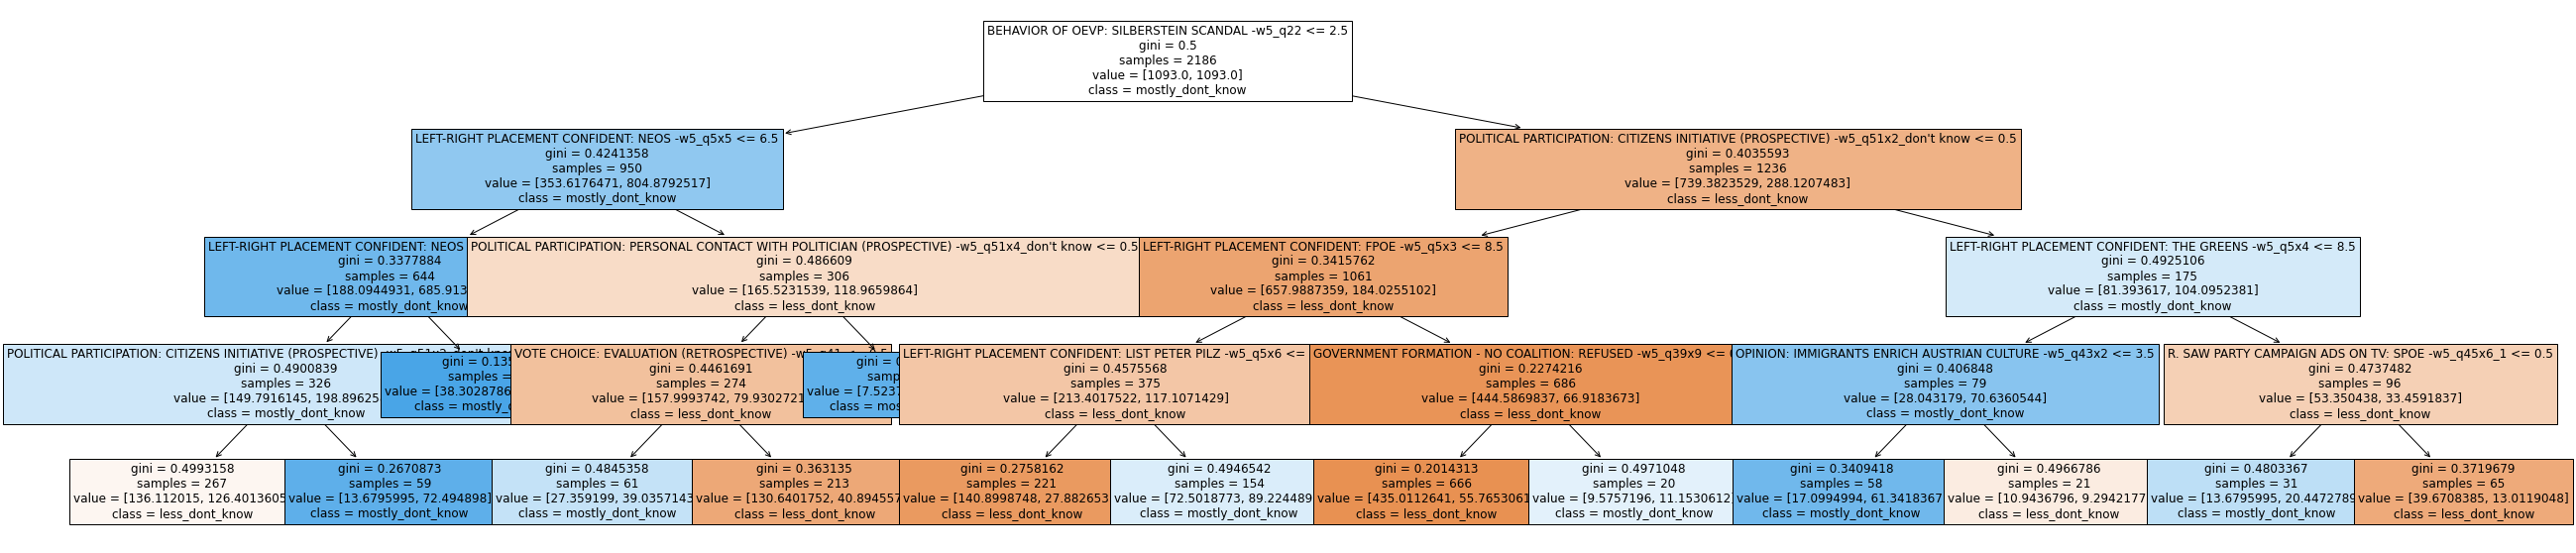

The most important features and its coefficients obtained by logistic regression:
BEHAVIOR OF OEVP: SILBERSTEIN SCANDAL -w5_q22 :  -0.563
ECON. SITUATION AUSTRIA: PROSPECTIVE (NEXT 12 MONTHS) -w5_q29 :  -0.561
LOST VOTES: SILBERSTEIN SCANDAL: DONT KNOW -w5_q18x9 :  0.512
POLITICAL PARTICIPATION: CITIZENS INITIATIVE (PROSPECTIVE) -w5_q51x2_don't know :  0.487
LEFT-RIGHT PLACEMENT CONFIDENT: THE GREENS -w5_q5x4 :  0.468
LEFT-RIGHT PLACEMENT CONFIDENT: LIST PETER PILZ -w5_q5x6 :  0.429
GOVERNMENT FORMATION - COALITION PARTNER: DONT KNOW -w5_q38x9 :  0.417
GOVERNMENT FORMATION - COALITION PARTNER: FPOE -w5_q38x3 :  -0.41
PREFERRED COALITION: SPOE-OEVP -w5_q34x1 :  -0.398
lr_placement_correct :  0.394
GOVERNMENT FORMATION - NO COALITION: DONT KNOW -w5_q39x8 :  0.37
Income_ord :  -0.354
ATTENTIVENESS TO SILBERSTEIN SCANDAL -w5_q17 :  -0.345
POLITICAL PARTICIPATION: PRODUCTS BOUGHT (PROSPECTIVE) -w5_q51x5_don't know :  0.344
GOVERNMENT FORMATION - NO COALITION: SPOE -w5_q39x1 :  -0.344
LEFT-R

In [3]:
names = ['less_dont_know', 'mostly_dont_know']
for wave in waves:
    
    df = pd.read_csv('../../data/data_online_personal_w' + wave + '.csv')
    political_data = pd.read_csv('../../data/data_online_political_w' + wave + '.csv')

    df = concat_df(df, political_data)
    y = df['dont_know_percentage_mean']
    X = df.drop(['panelpat', 'dont_know_percentage_mean', '88-bad_quality', '77-bad_quality', "don't know-bad_quality"], axis=1)
    cols = X.columns
    print(' ')
    print('WAVE: ', wave)
    print(Counter(y))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    #undersample = RandomUnderSampler(sampling_strategy='majority')
    #X_train, y_train = undersample.fit_resample(X_train, y_train)
    analysis_all_models(X_train, y_train, X_test, y_test, names)

In [35]:
clf_list = pd.DataFrame(clf_list)
recall_drop_final = pd.DataFrame(recall_drop_final)
recall_stay_final = pd.DataFrame(recall_stay_final)
accuracy_final = pd.DataFrame(accuracy_final)
wave_list = pd.DataFrame([x for item in waves for x in repeat(item, 5)]*2)
choose_y = pd.DataFrame(['same_agree_resp'] * 25 + ['dont_know_percentage_binary'] * 25)
results = pd.concat([choose_y, clf_list, recall_stay_final, recall_drop_final, wave_list, accuracy_final], axis=1)
results.columns = ['choose_y', 'clf', 'recall_stay', 'recall_drop', 'wave', 'accuracy']

### Model metrics

In [63]:
results

,choose_y,clf,recall_stay,recall_drop,wave,accuracy
0,same_agree_resp,"GridSearchCV(cv=5,\n estimator=DecisionTreeClassifier(class_weight='balanced',\n max_depth=4),\n param_grid={'min_samples_leaf': [20, 50, 100, 250]})",0.763158,0.852628,1,0.850277
1,same_agree_resp,"LinearSVC(class_weight='balanced', max_iter=10000)",0.342105,0.968750,1,0.952282
2,same_agree_resp,"LinearSVC(C=0.01, class_weight='balanced', max_iter=100000)",0.500000,0.937855,1,0.926349
3,same_agree_resp,SVC(class_weight='balanced'),0.263158,0.992188,1,0.973029
4,same_agree_resp,"LogisticRegressionCV(class_weight='balanced', cv=5, max_iter=10000)",0.342105,0.968040,1,0.951591
5,same_agree_resp,"GridSearchCV(cv=5,\n estimator=DecisionTreeClassifier(class_weight='balanced',\n max_depth=4),\n param_grid={'min_samples_leaf': [20, 50, 100, 250]})",0.677419,0.784349,2,0.781416
6,same_agree_resp,"LinearSVC(class_weight='balanced', max_iter=10000)",0.177419,0.964513,2,0.942920
7,same_agree_resp,"LinearSVC(C=0.01, class_weight='balanced', max_iter=100000)",0.467742,0.919017,2,0.906637
8,same_agree_resp,SVC(class_weight='balanced'),0.145161,0.992721,2,0.969469
9,same_agree_resp,"LogisticRegressionCV(class_weight='balanced', cv=5, max_iter=10000)",0.193548,0.965423,2,0.944248


Some models show quite a good result with quality of prediction so it makes sense to see what features are important there

### Short highlights which help to identify lower quality responses

For **same_agree_resp** DT performed way better than all other models and it makes sense to check features only from there while for **dont_know_percentage_binary** both DT & LR are worth to take a look. I just highlighted some of features in next table:

#### same_agree_resp
feature| more or less straightlining?
---|---
**wave 1**
___|___
days per week Salzburg.com|less days - more
feels fine with political situation| more 
party choice hypothetical - don't know| more
check question correct| less
police aithorities should be extended - agree|more
party choice FPOE|less
**wave 2**
___|___
PTV 10 (max)|less
disagrees that compromises means betraying ones principles|more
personal economic sutuation got better or stayed the same|less
**wave 3**
___|___
disagrees that immigrants should adapt to Austrian customs|more
**wave 4**
___|___
less income|less
intdur>11 mins|less
**wave 5**
___|___
disagrees that freedom of movement in EU provides more European sense of community|more
disagrees that rich people and immigrants get more attention than others|less

#### dont_know_percentage_binary
##### Decision tree
##### Linear regression